In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
shampoo=pd.read_csv("shampoo.csv")

In [67]:
shampoo.head()
type(shampoo)

pandas.core.frame.DataFrame

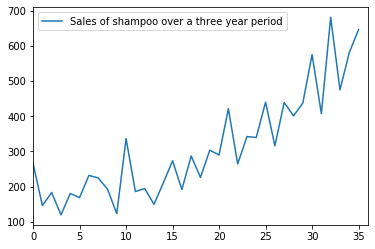

In [68]:
shampoo.plot()

In [69]:
##Converting dataframe to series while importing csv file
shampoo=pd.read_csv("shampoo.csv",index_col=[0],parse_dates=True,squeeze=True)
type(shampoo)

pandas.core.series.Series

In [70]:
shampoo.head()

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales of shampoo over a three year period, dtype: float64

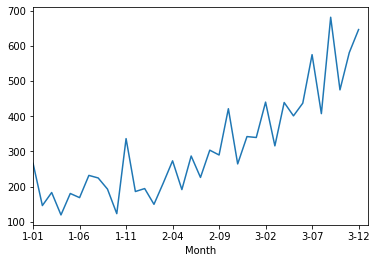

In [71]:
##Plotting using pandas
shampoo.plot()

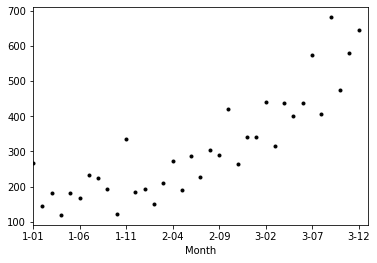

In [72]:
shampoo.plot(style='k.')

In [73]:
shampoo.size

37

In [74]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

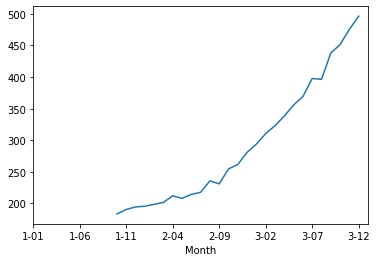

In [75]:
##Smoothening of the series-removing noise by taking moving average of k units
k=10
shampoo_mavg=shampoo.rolling(window=k).mean()
shampoo_mavg.plot() #Smooth curve obtained

In [76]:
shampoo.size

37

In [77]:
##Baseline/ Naive Model

In [78]:
shampoo_base=pd.concat([shampoo,shampoo.shift(1)],axis=1) #Shifting series one down and creating new column

In [79]:
shampoo_base

,Sales of shampoo over a three year period,Sales of shampoo over a three year period
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5


In [80]:
shampoo_base.columns=['Actual_Sales','Forecast_Sales']

In [81]:
shampoo_base.head()

,Actual_Sales,Forecast_Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [82]:
shampoo_base.dropna(inplace=True)
shampoo_base

,Actual_Sales,Forecast_Sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5
1-10,122.9,192.8


In [83]:
from sklearn.metrics import mean_squared_error
import numpy as np
import math

In [84]:
shampoo_base_error=mean_squared_error(shampoo_base.Actual_Sales,shampoo_base.Forecast_Sales)
shampoo_base_error=math.sqrt(shampoo_base_error)
shampoo_base_error

108.23764726616282

## Moving Average (MA) model

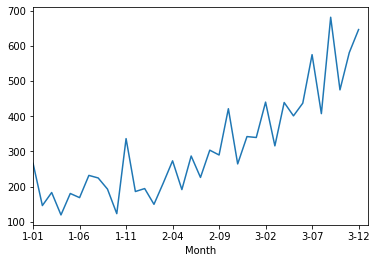

In [86]:
shampoo.plot()

In [87]:
shampoo.shape[0]

37

In [122]:
def MA(ds,k):
    #Creating array of moving averages
    m=[]
    for i in range(k):
        m.append(0)
    for i in range(ds.shape[0]):
        if i>=k:
            sum=0
            for j in range(i-k,i,1):
                sum+=ds[j]
            avg=sum/k
            m.append(avg)
    m=np.array(m)
    #Converting Numpy array to Series object
    forecast_MA = pd.Series(m)
    #Changing columns of new series to original series columns
    forecast_MA.index=shampoo.index
    #Combining both series (original and m) to create new Series
    shampoo_MA=pd.concat([shampoo,forecast_MA],axis=1) 
    #Changing column names of new series
    shampoo_MA.columns=['Actual_Sales','Forecast_Sales_MA']
    #Dropping the NaN values generated
    shampoo_MA.dropna(inplace=True)
    #return new Series
    return shampoo_MA

In [130]:
shampoo_MA=MA(shampoo,2)
shampoo_MA_error=mean_squared_error(shampoo_MA.Actual_Sales,shampoo_MA.Forecast_Sales_MA)
shampoo_MA_error=math.sqrt(shampoo_MA_error)
shampoo_MA_error

91.51910205889625

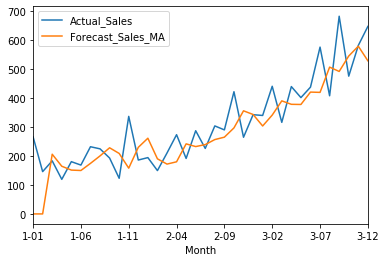

In [131]:
shampoo_MA.plot()